# DAT405 - Assignment 5
### Martin Hansson 20 hours 
### Joakim Bake 20 hours

**DAT405 Introduction to Data Science and AI, 2010-2021, Study Period 2** <br/>
**Assignment 5: Reinforcement learning and Classification** <br/>
**Due Date: Dec 9, 23:59** <br/>

---


**What to submit**
*   **The entire assignment should be submitted through the notebook. No separate file will be accepted.** You can submit either the notebook itself, or a public link to a Google Colab notebook<br/>

*In the notebook:*
*	State your names and how many hours each person spent on the assignment.
*	The solutions and answers to the theoretical and practical problems, including LaTeX math-mode equations, plots and tables etc.
*	All plots/results should be visible such that the notebook does not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.<br/>

*Before submitting:*
*   Make sure that your code can run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com.

**Self-check**<br/>
Is all the required information included? Have you answered all questions to the best of your ability? Anything else you can easily check? (details, terminology, arguments, clearly stated answers etc.?) Does your notebook run and can reproduce the results, plots and tables?

**Grading**<br/>
Grading will be based on a qualitative assessment of each assignment. It is important to:
*	Present clear arguments
*	Present the results in a pedagogical way
*	Show understanding of the topics (e.g, write a pseudocode) 
*	Give correct solutions
*	Make sure that the code is well commented 

**Again, as mentioned in general guidelines, all code should be written here. And this same ipython notebook file (Assignment5_Reinforcement_Learning.ipynb) should be submitted with answers and code written in it. No separate file will be accepted.** 


# Primer

## Decision Making
The problem of **decision making under uncertainty** (commonly known as **reinforcement learning**) can be broken down into
two parts. First, how do we learn about the world? This involves both the
problem of modeling our initial uncertainty about the world, and that of drawing conclusions from evidence and our initial belief. Secondly, given what we
currently know about the world, how should we decide what to do, taking into
account future events and observations that may change our conclusions?
Typically, this will involve creating long-term plans covering possible future
eventualities. That is, when planning under uncertainty, we also need to take
into account what possible future knowledge could be generated when implementing our plans. Intuitively, executing plans which involve trying out new
things should give more information, but it is hard to tell whether this information will be beneficial. The choice between doing something which is already
known to produce good results and experiment with something new is known
as the **exploration-exploitation dilemma**.

## The exploration-exploitation trade-off

Consider the problem of selecting a restaurant to go to during a vacation. Lets say the
best restaurant you have found so far was **Les Epinards**. The food there is
usually to your taste and satisfactory. However, a well-known recommendations
website suggests that **King’s Arm** is really good! It is tempting to try it out. But
there is a risk involved. It may turn out to be much worse than **Les Epinards**,
in which case you will regret going there. On the other hand, it could also be
much better. What should you do?
It all depends on how much information you have about either restaurant,
and how many more days you’ll stay in town. If this is your last day, then it’s
probably a better idea to go to **Les Epinards**, unless you are expecting **King’s
Arm** to be significantly better. However, if you are going to stay there longer,
trying out **King’s Arm** is a good bet. If you are lucky, you will be getting much
better food for the remaining time, while otherwise you will have missed only
one good meal out of many, making the potential risk quite small.

## Overview
* To make things concrete, we will first focus on decision making under **no** uncertainity, i.e, given we have a world model, we can calculate the exact and optimal actions to take in it. We will first introduce **Markov Decision Process (MDP)** as the world model. Then we give one algorithm (out of many) to solve it.


* Next, we will work through one type of reinforcement learning algorithm called Q-learning. Q-learning is an algorithm for making decisions under uncertainity, where uncertainity is over the possible world model (here MDP). It will find the optimal policy for the **unknown** MDP, assuming we do infinite exploration.

## Markov Decision Process

Markov Decision Process (MDP) provides a mathematical framework for modeling sequential decision making under uncertainty. A MDP consists of five parts: the specific decision times, the state space of the environment/system, the available actions for the decision maker, the rewards, and the transition probabilities between the states.

* Decision epochs: $t={1,2,...,T}$, where $T\leq \infty$
* State space: $S=\{s_1,s_2,...,s_N\}$ of the underlying environment
* Action space $A=\{a_1,a_2,...,a_K\}$ available to the decision maker at each decision epoch
* Reward functions $R_t = r(a_t,s_t,s_{t+1})$ for the current state and action, and the resulting next state
* Transition probabilities $p(s'|s,a)$ that taking action $a$ in state $s$ will lead to state $s'$

At a given decision epoch $t$ and system state $s_t$, the decions maker, or *agent*, chooses an action $a_t$, the system jumps to a new state $s_{t+1}$ according to the transition probability $p(s_{t+1}|s_t,a_t)$, and the agent receives a reward $r_t(s_t,a_t,s_{t+1})$. This process is then repeated for a finite or infinite number of times.

A *decision policy* is a function $\pi: s \rightarrow a$, that gives instructions on what action to choose in each state. A policy can either be *deterministic*, meaning that the action is given for each state, or *randomized* meaning that there is a probability distribution over the set of possible actions. Given a specific policy $\pi$ we can then compute the the *expected total reward* when starting in a given state $s_1 \in S$, which is also known as the *value* for that state, 

$$V^\pi (s_1) = E\left[ \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) {\Large |} s_1\right] = \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) p(s_{t+1} | a_t,s_t)$$ 

where $a_t = \pi(s_t)$. To ensure convergence and to control how much credit to give to future rewards, it is common to introduce a *discount factor* $\gamma \in [0,1]$. For instance, if you think all future rewards should count equally, you would use $\gamma = 1$, while if you only care less about future rewards you would use $\gamma < 1$. The expected total *discounted* reward becomes

$$V^\pi( s_1) = \sum_{t=1}^T \gamma^{t-1} r(s_t,a_t, s_{t+1}) p(s_{t+1} | s_t, a_t) $$

Now, to find the *optimal* policy we want to find the policy $\pi^*$ that gives the highest total reward $V^{\pi^*}(s)$ for all $s\in S$. That is

$$V^{\pi^*}(s) \geq V^\pi(s), s\in S$$

The problem of finding the optimal policy is a _dynamic programming problem_. It turns out that a solution to the optimal policy problem in this context is the *Bellman equation*. The Bellman equation is given by

$$V(s) = \max_{a\in A} \left\{\sum_{s'\in S} p(s'|s,a)( r(s,a,s') +\gamma V(s')) \right\}$$

Thus, it can be shown that if $\pi$ is a policy such that $V^\pi$ fulfills the Bellman equation, then $\pi$ is an optimal policy.

A real world example would be an inventory control system. Your states would be the amount of items you have in stock. Your actions would be the amount to order. The discrete time would be the days of the month. The reward would be the profit.  

A major drawback of MDPs is called the "Curse of Dimensionality". MDPs unfortunately do not scale very well with increasing sets of states or actions.   


## Question 1

In this first question we work with the deterministic MDP, no code is necessary in this part.

Setup:

* The agent starts in state **S**
* The actions possible are **N** (north), **S** (south), **E** (east), and **W** west. 
* Note, that you cannot move outside the grid, thus all actions are not available in every box.
* When reaching **F**, the game ends (absorbing state).
* The numbers in the boxes represent the rewards you receive when moving into that box. 
* Assume no discount in this model: $\gamma = 1$

The reward of a state $r(s=(x, y))$ is given by the values on the grid:
    
| | | |
|----------|----------|---------|
|-1 |1|**F**|
|0|-1|1|  
|-1 |0|-1|  
|**S**|-1|1|

Let $(x,y)$ denote the position in the grid, such that $S=(0,0)$ and $F=(2,3)$.

**1a)** What is the optimal path of the MDP above? Is it unique? Submit the path as a single string of directions. E.g. NESW will make a circle.

**Answer**: EENNN, which is not a unique optimum. We could go between points with -1 and +1 reward many times and still get the same total reward. Another path is EENNWNE (same total reward, longer path).

**1b)** What is the optimal policy (i.e. the optimal action in each state)?

**Answer**: For each state there are several optimal actions, giving same reward. For example in the starting point, both East and North would be optimal action. The table below shows one optimal action for each state.

| | | |
|----------|----------|---------|
|E |E|**F**|
|N|N|N|  
|N |N|N|  
|**E**|E|N|

**1c)** What is expected total reward for the policy in 1b)?

**Answer**: 

Following the policy in the table in 1b and summing up, the total reward comes out to be -1+1-1+1+0 = 0 from EENNN.





## Value Iteration

For larger problems we need to utilize algorithms to determine the optimal policy $\pi^*$. *Value iteration* is one such algorithm that iteratively computes the value for each state. Recall that for a policy to be optimal, it must satisfy the Bellman equation above, meaning that plugging in a given candidate $V^*$ in the right-hand side (RHS) of the Bellman equation should result in the same $V^*$ on the left-hand side (LHS). This property will form the basis of our algorithm. Essentially, it can be shown that repeated application of the RHS to any intial value function $V^0(s)$ will eventually lead to the value $V$ which statifies the Bellman equation. Hence repeated application of the Bellman equation will also lead to the optimal value function. We can then extract the optimal policy by simply noting what actions that satisfy the equation. The process of repeated application of the Bellman equation what we here call the _value iteration_ algorithm.

The value iteration algorithm practically procedes as follows:

```
epsilon is a small value, threshold
for x from i to infinity 
do
    for each state s
    do
        V_k[s] = max_a Σ_s' p(s′|s,a)*(r(a,s,s′) + γ*V_k−1[s′])
    end
    if  |V_k[s]-V_k-1[s]| < epsilon for all s
        for each state s,
        do
            π(s)=argmax_a ∑_s′ p(s′|s,a)*(r(a,s,s′) + γ*V_k−1[s′])
            return π, V_k 
        end
end

```






**Example:** We will illustrate the value iteration algorithm by going through two iterations. Below is a 3x3 grid with the rewards given in each state. Assume now that given a certain state $s$ and action $a$, there is a probability of 0.8 that that action will be performed and a probability of 0.2 that no action is taken. For instance, if we take action **E** in state $(x,y)$ we will go to $(x+1,y)$ 80 percent of the time (given that that action is available in that state, that is, we stay on the grid), and remain still 20 percent of the time. We will use have a discount factor $\gamma = 0.9$. Let the initial value be $V^0(s)=0$ for all states $s\in S$. 

| | | |  
|----------|----------|---------|  
|0|0|0|
|0|10|0|  
|0|0|0|  


**Iteration 1**: The first iteration is trivial, $V^1(s)$ becomes the $\max_a \sum_{s'} p(s'|s,a) r(s,a,s')$ since $V^0$ was zero for all $s'$. The updated values for each state become

| | | |  
|----------|----------|---------|  
|0|8|0|
|8|2|8|  
|0|8|0|  
  
**Iteration 2**:  
  
Staring with cell (0,0) (lower left corner): We find the expected value of each move:  
Action **S**: 0  
Action **E**: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action **N**: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action **W**: 0

Hence any action between **E** and **N** would be best at this stage.

Similarly for cell (1,0):

Action **N**: 0.8( 10 + 0.9 \* 2) + 0.2(0 + 0.9 \* 8) = 10.88 (Action **N** is the maximizing action)  

Similar calculations for remaining cells give us:

| | | |  
|----------|----------|---------|  
|5.76|10.88|5.76|
|10.88|8.12|10.88|  
|5.76|10.88|5.76|  


## Question 2

**2a)** Implement the value iteration algorithm just described here in python, and show the converging optimal value function and the optimal policy for the above 3x3 grid. Hint: use the pseudo-code above as a starting point, but be sure to explain what every line does.

**Answer:** Code (see below). Optimal value function and optimal policy (see output from code)

**2b)** Explain why the result of 2a) does not depend on the initial value $V_0$.

**Answer:** Bellman equation convergence is determined by the discount factor gamma. The reason the result does not depend on the initial V values is 
that gamma < 1.0. Since the discount factor is < 1 it will, 
after many iterations, be of such a high power that it makes the initial V value "disappear". If gamma was equal to 1.0, the initial value would have an impact on the end result. 

## 2a

In [1]:
# We used the code from the provided notebook "q_learninig_froze_lake" as a starting point 

import numpy as np

rewards = np.array([[0,0,0],
                    [0,10,0],
                    [0,0,0]])


p_move = 0.8
p_notmove = 1- 0.8
df = 0.9
epsilon = 0.001 #Convergence criteria


# Get all possible actions and the resulting states
# and return as 2 arrays
def possible_actions(g, s) :
    pa = np.zeros((4), dtype = bool)
    sp = np.zeros((4, 2), dtype = int)
    # East
    if s[1]+1 <= g.shape[1]-1 :
        pa[0] = True
        sp[0] = [s[0], s[1]+1] 
    # West
    if s[1]-1 >= 0 :
        pa[1] = True 
        sp[1] = [s[0], s[1]-1] 
    # North
    if s[0]-1 >= 0 :
        pa[2] = True 
        sp[2] = [s[1], s[0]-1] 
    # South
    if s[0]+1 <= g.shape[0]-1 :
        pa[3] = True
        sp[3] = [s[1], s[0]+1] 
    return pa, sp 

# Get the reward for moving to a state
def get_reward(r, s) :
    return r[s[0]] [s[1]] 

# Get the statevalue for a state
def get_V(g, s) :
    return g[s[0]] [s[1]] 


# Calculate a new statevalue
def maxaction(g, r, s) :
    v = 0
    mv = 0 
    pa, sp = possible_actions(g, s)
    # For all possible actions
    for i in range (4) :
        # Chose the one with the highest value and return it
        if pa[i] :
            v = p_move * (get_reward(r, sp[i]) + df * get_V(g, sp[i])) + p_notmove * (get_reward(r, s) + df * get_V(g, s))
            if v > mv :
                mv = v
    return mv


# Get the policy matrix from the value function
def get_policy (V) :
    policy = np.zeros((3, 3), dtype = int)
    # For every state
    for i in range (V.shape[0]) :
        for j in range  (V.shape[1]) :
            tmp = 0
            # Get all possible and their corresponding state 
            pa, sp = possible_actions(V, [i, j])
            for a in range (4) :
                if pa[a] :                   
                    # Chose the action that gives the highest value and insert that value in
                    # the decision policy matrix. If there are 2 decisions thar are equal we 
                    # will return the first found    
                    if get_V(V, sp[a]) > tmp :
                        policy[i][j] = a
                        tmp = get_V(V, sp[a])
    return policy


# Translate the numbers in the policy matrix the readable directions
def translate_policy (p) :
    translated_policy = np.zeros((3,3), dtype=str)
    for i in range (V.shape[0]) :
        for j in range  (V.shape[1]) :
            if p[i][j] == 0 :
                translated_policy[i][j]  = 'East'
            elif p[i][j] == 1 :
                translated_policy[i][j]  = 'West'
            elif p[i][j] == 2 :
                translated_policy[i][j]  = 'North'
            elif p[i][j] == 3 :
                translated_policy[i][j]  = 'South'
    return translated_policy

            
# Main program, makes the value iteration to create a value function and prints it out
# together with a decision policy 
V_new = np.zeros((3,3))
while (True) :
    converged = True
    V = np.copy(V_new)
    # For every state
    for i in range (V.shape[0]) :
        for j in range  (V.shape[1]) :
            # Get the new highest value and update the new value function
            V_new[i][j] = maxaction(V, rewards, [i,j])
            # Check for convergence
            if  abs(V_new[i][j] - V[i][j]) > epsilon :
                converged = False
    if converged : 
        break 


# Print the results
print('****Optimal policy****')
print(translate_policy(get_policy(V_new)))
print()
print('****Optimal Value function****')
print(np.around(V_new,2))

****Optimal policy****
[['E' 'S' 'W']
 ['E' 'E' 'W']
 ['E' 'N' 'W']]

****Optimal Value function****
[[45.6  51.94 45.6 ]
 [51.94 48.04 51.94]
 [45.6  51.94 45.6 ]]


**DISCUSSION:** Please note that the decison policy is not the only optimal. E.g. if we are in the left bottom corner, North is an as valid 
action as East. The same goes for all the corner states but if you are next to the state in the middle, the optimal action is 
always to "go" to the center. I this case we chosed to make the decision policy this way but one could as well have it non deterministic 
since more than one action is valid. What to choose depends on the application.  

## Reinforcement Learning (RL)
Until now, we understood that knowing the MDP, specifically $p(s'|a,s)$ and $r(a,s,s')$ allows us to efficiently find the optimal policy using the value iteration algorithm. Reinforcement learning (RL) or decision making under uncertainity, however, arises from the question of making optimal decisions without knowing the true world model (the MDP in this case).

So far we have defined the value function for a policy through $V^\pi$. Let's now define the *action-value function*

$$Q^\pi(s,a) = \sum_{s'} p(s'|a,s) [r(a,s,s') + \gamma V^\pi(s')]$$

The value function and the action-value function are directly related through

$$V^\pi (s) = \max_a Q^\pi (s,a)$$

i.e, the value of taking action $a$ in state $s$ and then following the policy $\pi$ onwards. Similarly to the value function, the optimal $Q$-value equation is:

$$Q^*(s,a) = \sum_{s'} p(s'|a,s) [r(a,s
]\,s') + \gamma V^*(s')]$$

and the relationship between $Q^*(s,a)$ and $V^*(s)$ is simply

$$V^*(s) = \max_{a\in A} Q^*(s,a).$$

## Q-learning

Q-learning is a RL-method where the agent learns about its unknown environment (i.e. the MDP is unknown) through exploration. In each time step *t* the agent chooses an action *a* based on the current state *s*, observes the reward *r* and the next state *s'*, and repeats the process in the new state. Q-learning is then a method that allows the agent to act optimally. Here we will focus on the simplest form of Q-learning algorithms, which can be applied when all states are known to the agent, and the state and action spaces are reasonably small. This simple algorithm uses a table of Q-values for each $(s,a)$ pair, which is then updated in each time step using the update rule in step $k+1$

$$Q_{k+1}(s,a) = Q_k(s,a) + \alpha \left( r(s,a) + \gamma \max \{Q_k(s',a')\} - Q_k(s,a) \right) $$ 

where $\gamma$ is the discount factor as before, and $\alpha$ is a pre-set learning rate. It can be shown that this algorithm converges to the optimal policy of the underlying MDP for certain values of $\alpha$ as long as there is sufficient exploration. While a constant $\alpha$ generally does not guarantee us to reach true convergence, we keep it constant at $\alpha=0.1$ for this assignment.

## OpenAI Gym

We shall use already available simulators for different environments (worlds) using the popular OpenAI Gym library. It just implements [different types of simulators](https://gym.openai.com/) including ATARI games. Although here we will only focus on simple ones, such as the [Chain enviroment](https://gym.openai.com/envs/NChain-v0/) illustrated below.
![alt text](https://chalmersuniversity.box.com/shared/static/6tthbzhpofq9gzlowhr3w8if0xvyxb2b.jpg)
The figure corresponds to an MDP with 5 states $S = \{1,2,3,4,5\}$ and two possible actions $A=\{a,b\}$ in each state. The arrows indicate the resulting transitions for each state-action pair, and the numbers correspond to the rewards for each transition.

## Question 3
You are to first familiarize with the framework using its [documentation](http://gym.openai.com/docs/), and then implement the Q-learning algorithm for the Chain enviroment (called 'NChain-v0') using default parameters. Finally print the $Q^*$ table at convergence. Convergence is **not** a constant value, rather a stable plateau with some noise. Take $\gamma=0.95$. You can refer to the Q-learning (frozen lake) Jupyter notebook shown in class, uploaded on Canvas. Hint: start with a small learning rate.



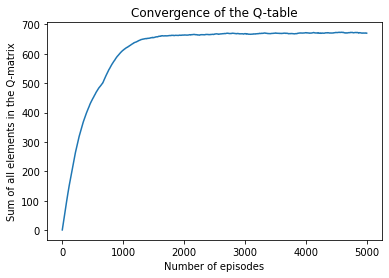

*** Q-matrix ***
[[61.37 60.68]
 [64.92 61.62]
 [69.56 62.77]
 [75.41 64.19]
 [83.07 66.25]]
Column 1 represents action a and column 2 represents action b


In [2]:
# Based on the notebook "q_learning_frozen_lake"
import gym
import numpy as np
import random
import math
import time
import matplotlib.pyplot as plt

# Leraning rate, high learning rate means updating Q in big steps
lr = 0.0005

# Discount factor
df = 0.95

# Epsilon, if e=1 --> always Explore, if e=0 --> Always exploit
e = 0.1 #Explore with prob=0.1

# Number of episodes we will use for training
episodes = 5000

# create the environment
env = gym.make('NChain-v0') 

# List used to check for conversion when finished
conv_list = []

# Create our Q matrix
Q = np.zeros([5, 2])



for _ in range (episodes):
    # reset the environment
    state = env.reset()
    done = False
    # Make a copy of the Q matrix
    Q_old = np.copy(Q)
    # Repeat untiol the environment tells us we are done
    while done == False :
        # Chose a action
        if random.uniform(0, 1) < e :
            action = env.action_space.sample()
        else :
            action = np.argmax(Q[state,:])
        # Then we perform the action and receive the feedback from the environment
        new_state, reward, done, info = env.step(action)
        update = reward + (df*np.max(Q[new_state,:])) - Q[state, action]
        Q[state,action] += lr*update 
        state = new_state
    # Add the sum of the elemnts to the list in order to plot it when we are done 
    conv_list.append(np.sum(Q))

plt.title('Convergence of the Q-table')
plt.xlabel('Number of episodes')
plt.ylabel('Sum of all elements in the Q-matrix')
x = np.array([i for i in range(len(conv_list))]) 
y = conv_list

plt.plot(x,y)
plt.show()

print('*** Q-matrix ***')
print(np.around(Q,2))

print('Column 1 represents action a and column 2 represents action b')

**DISCUSSION Q3:** In the results above we can see the that the Q-matrix converges. The measurement we selected for convergence was the sum of 
all the elements in the Q-matrix. We think that was a simple solutions that  works fine in this case since we know the 
algorithm will stabilize around certain values with som noice and therefore it will stabilize around a certain sum.

We picked the learning rate using trail and error. As always picking the leraning rate is trade between speed of convergence,
not getting stuck in local minimas, and not being too noisy around the global minima (optimal solution) we are looking for. 
In our case a learning rate of 0.0005 worked fine. It converges pretty fast and it ends up in stable state.

We can also conclude that the Q-matrix gives us the correct action in every state. Using it we will always take action "a" which 
is the correct action given this environment. 


## Question 4

**4a)** Define the MDP corresponding to the Chain environment above and verify that the optimal $Q^*$ value obtained using simple Q-learning is the same as the optimal value function $V^*$ for the corresponding MDP's optimal action. Hint: compare values obtained using value iteration and Q-learning.

**4b)** What is the importance of exploration in RL? Explain with an example.

## 4a

In [ ]:
# Representation of the "NChain-v0"-environment
# Each row is a state
# The first tuple is the reward for action a and b respectively
# The second tuple is the the next state for action a and b respectively
reward_state = np.array([[(0, 2), (1, 0)],
                        [(0, 2), (2, 0)],
                        [(0, 2), (3, 0)],
                        [(0, 2), (4, 0)],
                        [(10, 2), (4, 0)]])

# Probability to make the move choosen, taken from the documentation for the NChain-v0"-environment
prob_move = 0.8
prob_slip = 1- prob_move

# Number used to measure convergence
eps = 0.01

# Initiate the value function
V_new = np.zeros((5))

# Main program, calculates the Value function
while (True) :
    converged = True
    V = np.copy(V_new)
    # For everey state
    for i in range (V.shape[0]) :
        # Calculate the value for both action a and b
        aa = prob_move * (reward_state[i][0][0] + df*V[reward_state[i][1][0]]) + prob_slip * (reward_state[i][0][1] + df*V[reward_state[i][1][1]])
        ab = prob_move * (reward_state[i][0][1] + df*V[reward_state[i][1][1]]) + prob_slip * (reward_state[i][0][0] + df*V[reward_state[i][1][0]])
        # Chose the largest value
        if aa >= ab :
            V_new[i] = aa
        else :
            V_new[i] = ab
        # Check for convergence
        if  abs(V_new[i] - V[i]) > eps :
            converged = False
    if converged : 
        break 
print('****Value function****')
print(np.around(V_new, 2))
print()
print('*** Q* value from part 3 ***')
print(np.around(Q[:,0],2))




****Value function****
[61.19 64.71 69.33 75.41 83.41]

*** Q* value from part 3 ***
[61.64 65.17 69.82 75.78 83.37]


**DISCUSSION Q4a:** Here we can see that the Value function we get, corresponds very well to optimal actions in the Q-matrix in part 3. This tells 
us thet the Q-learning algortihm found an optimal soultion in this case.

**Answer 4b:** The RL algorithm does not know the optimal solution beforehand. The aim is to find it by exploration and exploitation. Iterating through different scenarios, 
options with different total rewards are found. Having a _greedy_ approach, i.e. high level of exploitation where the most rewarding action at the present 
moment are taken, large part of the state space could be lost risking ending up in a local optimum. However, with a non-greedy (or _Epsilon greedy_) approach there is high level 
of exploration which lead to low level of learing from experience and hence, small improvements. This means that there is a trade-off between exploration and 
exploitation. The _decaying Epsilon_ method tries to decrease the percentage dedicated for exploration as time goes by since the value of the 
gained infomation from exploration will decrease as time goes by. This gives a good balance between exploration and exploitation. 


We are all confronted with these kind of descisions on daily basis: Should I keep my job or find a new one? Should I buy a new kind of yoghurt or buy the same as before?
To illustrate this with an exmaple, we consider the problem described in the introduction of this report: 
choosing restaurants on vacation where the quality of the restaurants are not known beforehand. Maybe you find 
a _good_ restaurant you like on the first night and then you go to this restaurant each night (no exploration). Then you might miss out on other, better options. 
This would be the greedy approach, meaning you are maximizing the expected 
reward each day seperately while not thinking about future potential reward. On the other hand, if you are trying to find a new, better restaurant each day, 
you will not utilize the learning/experiences from previous nights and the expected reward would be corrosponding to an average restaurant 
(of course assuming not reading reviews). The would be the Epsilon greedy approach.
A reasonable trade off would in this case would be to have high level of exploration for a couple days and then go to the restaurant you liked best the 
rest of the time. This would be the decaying Epsilon approach.

## Question 5

**5a)** Give a summary of how a decision tree works and how it extends to random forests.

**Answer:** In general a decision tree ask questions and based on the answers of the questions, it classifies the object. The answers to the questions is categorial/discrete (often 2 options but could be more). The question could be based on numerics (for example: Are you taller than 1.8 m? YES/NO). Then you arrange the questions in a tree structure with the _Root node_ at the top representing the first question asked. Then the root node branches (each branch represent an answer to the question) into 2 new nodes which could be either _internal node(s)_ (which would be a new question) and/or a _leaf node(s)_ (bottom of the tree). For a new _internal node_ there is a new question that branches to a leaf and/or internal nodes. Then you follow the tree from top to bottom until you reach a leaf node. The leaf node represent the outcome of the object subjected to classification.

When building a decision tree, the question containing most information (i.e. classifies the data set with highest accuaracy) are chosen as root node. And then you choose the questions in descending order (w.r.t information). This is often measured by Gini Impurity which is the probability of assigning an object to the wrong class for a given question. Hence the lowest Gini impurity will be at the top of the tree.

A random forest is using a form of decision tree, but instead of each question/node being selected only a subset of the nodes are taken into consideration as candidates for each nextcoming node. Another difference is that it is built on randomly selected data points rather than the entire set of data. The random forest is then built up by a collection of different sub decision trees, and uses the average of the trees to decide on the predicted class for a observation.


The example below shows a descision tree to predict wheather a person has heart disease:

| | | | |  
|----------|----------|---------|---------|
|Age over 40?|Eats junkfood 3+ days a week|Exercises 2+ times a week|**Has heartdisease?**|
|Yes|Yes|No|**Yes**|
|No|Yes|No|**Yes**|
|Yes|No|Yes|**No**|
|No|No|Yes|**No**|

Where the last column represents the target.

In a decision tree, all 3 parameters are considered when deciding what node should be the root node. For an arbitrary tree in the random forest, we might only include the first two parameters as the root node, pick the second one and so on. 

For a regular decision tree, the feature of the root node will have a higher impact on the prediction outcome than nodes further down the tree. With a random forest consisting of multiple trees with subsets of the parameters, the node order will be different for different sub-trees, making the prediction less sensitive. A decision tree is also more sensitive to overfitting, as the accuracy increase when you include more nodes. 



**5b)** Explain what makes reinforcement learning different from supervised learning tasks such as regression or classification.

**Answer:** In supervised learning the algorithm learns from labeled data. Meaning that every input comes with a target. The “job” of 
the algorithm is to make a function mapping of the input data and the targets. The goal is that the mapping will 
generalize to new unseen input data.  

Reinforcement learning on the other hand does not require any data. Instead we have an agent which acts upon an environment 
and get rewards depending on its action. One can say that the agent creates its own training data by interacting with the 
environment. The algorithm learns by trail and error. It samples from possible actions, observes the outcome and , hopefully, 
it learns an optimal strategy for the problem at hand.

The differences makes them suitable for different purposes. RL is often used in AI applications due to its interactive nature while supervised learning are used to gain insights from large amount of data and predicting future outcome based on historical data.



# References
Primer/text based on the following references:
* http://www.cse.chalmers.se/~chrdimi/downloads/book.pdf
* https://github.com/olethrosdc/ml-society-science/blob/master/notes.pdf